### Import DEPLOT Pipeline

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

In [2]:
pipe = pipeline("visual-question-answering", model="google/deplot",device = "cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

The model 'Pix2StructForConditionalGeneration' is not supported for visual-question-answering. Supported models are ['BlipForQuestionAnswering', 'Blip2ForConditionalGeneration', 'ViltForQuestionAnswering'].


### Import DEPLOT Processor & Model

In [1]:
# Load model directly
from transformers import AutoProcessor, AutoModelForImageTextToText
import torch

device = torch.device("cuda")
processor = AutoProcessor.from_pretrained("google/deplot")
model = AutoModelForImageTextToText.from_pretrained("google/deplot").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


['plot1.png', 'plot2.png', 'plot3.png']


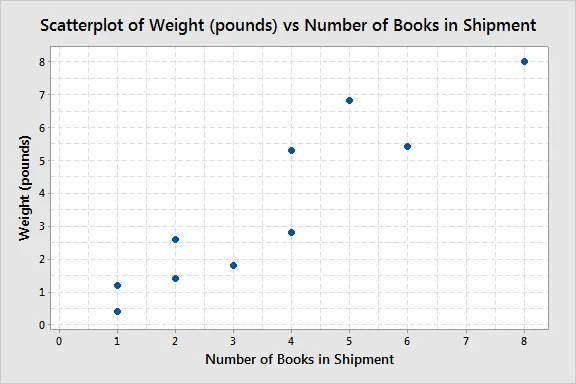

In [15]:
from PIL import Image
import os

path = "/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project"

# get images from /data/images directory
filenames =[]
images = []
for filename in os.listdir((path+'/data/images')):
  filenames.append(filename)
  images.append(Image.open(path+'/data/images/'+filename))
print(filenames)
images[2]

In [34]:
inputs = processor(images=images[2], text="What kind of plot is the figure below:", return_tensors="pt").to(device)
#inputs = processor(images=images[2], text="Generate underlying data table of the figure below:", return_tensors="pt").to(device)
predictions = model.generate(**inputs, max_new_tokens=512)
table = processor.decode(predictions[0], skip_special_tokens=True)
print(table)

TITLE | Scatterplot of Weight (pounds) vs Number of Books in Shipment<0x0A>Number of Books in Shipment | Weight (pounds)<0x0A>0 | 0<0x0A>1 | 1.20<0x0A>2 | 2.60<0x0A>3 | 1.80<0x0A>4 | 5.30<0x0A>5 | 6.80<0x0A>6 | 5.45<0x0A>7 | 7.90<0x0A>8 | 8.00


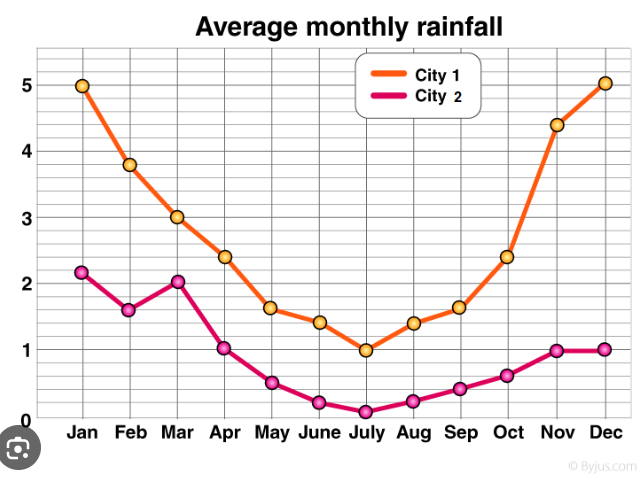

In [18]:
a=[]
for e in table.split('<0x0A>'):
  a.append(e.split(' | '))

In [19]:
a

[['TITLE', 'Scatterplot of Weight (pounds) vs Number of Books in Shipment'],
 ['Number of Books in Shipment', 'Weight (pounds)'],
 ['0', '0'],
 ['1', '1.20'],
 ['2', '2.60'],
 ['3', '1.80'],
 ['4', '5.30'],
 ['5', '6.84'],
 ['6', '5.45'],
 ['7', '7.90'],
 ['8', '8.00']]

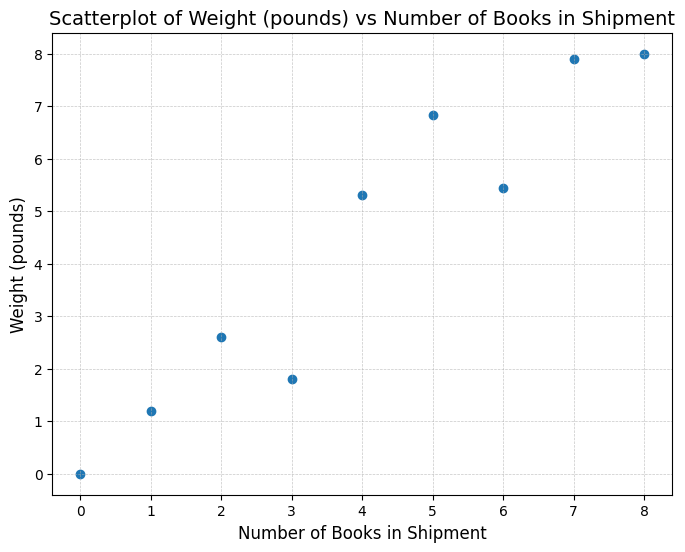

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title('Scatterplot of Weight (pounds) vs Number of Books in Shipment', fontsize=14)
plt.xlabel('Number of Books in Shipment', fontsize=12)
plt.ylabel('Weight (pounds)', fontsize=12)

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

x = [float(a[i][0]) for i in range(2,len(a))]
y = [float(a[i][1]) for i in range(2,len(a))]
plt.scatter(x,y)
plt.show()